This notebook results are only for testing purposes, and the method used is not representative of the final output in the **Perf_evaluation** notebook.

The purpose of this notebook is to **identify necessary KPIs**. Scroll to cells 7 to 13, to check the correlation plots and matrices.

For result summary, please scroll down to the bottom

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load and check the data

df = pd.read_csv('data2.csv', header=1)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Salesman_ID,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target
0,CA-3697,2012,897,140.2,935,488,125759,976
1,AL-9060,2012,759,121.0,869,349,183678,698
2,NC-6029,2012,841,102.1,852,288,85866,288
3,MI-1982,2012,583,147.2,749,205,171635,410
4,VT-1811,2012,750,116.7,810,572,87525,1144


In [3]:
#Check basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
Salesman_ID                        250 non-null object
Year                               250 non-null int64
Units_Sold                         250 non-null int64
Unit_Price                         250 non-null float64
Customer_connects_count            250 non-null int64
New_customer_count                 250 non-null int64
Pipeline Revenue                   250 non-null int64
New_customer_acquisition_target    250 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 15.7+ KB


All the data types are in Numerical formats, and there are no null values.

In [14]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicate values and the data is clean. Below, will be some data exploration steps trying to asses the sales performance of each sales man

In [155]:
#Grouping by Salesman_id and year

gb = df.groupby(['Salesman_ID', 'Year']).sum()
gb.head()

Units_Sold  Unit_Price  Customer_connects_count  \
Salesman_ID Year                                                    
AA-5468     2012         457       131.6                      687   
            2013         720       125.6                      757   
            2014         787       105.0                      976   
            2015         455       114.6                      913   
            2016         204       111.5                      637   

                  New_customer_count  Pipeline Revenue  \
Salesman_ID Year                                         
AA-5468     2012                 114            120282   
            2013                 604            180864   
            2014                 110            165270   
            2015                  62            104286   
            2016                 117             45492   

                  New_customer_acquisition_target  target_ratio  \
Salesman_ID Year                                                  
AA-5468     2012                              114           1.0   
            2013                             1208           0.5   
            2014                              220           0.5   
            2015                              124           0.5   
            2016                              117           1.0   

                  revenue_actual  
Salesman_ID Year                  
AA-5468     2012         60141.2  
            2013         90432.0  
            2014         82635.0  
            2015         52143.0  
            2016         22746.0

In [19]:
# Salesman who has sold the Unit at Maximum price

gb['Unit_Price'].idxmax()

('OR-8647', 2014)

In [20]:
# Salesman who has sold the most number of units
gb['Units_Sold'].idxmax()

('ID-4433', 2012)

In [4]:
# Adding Customer acquistion target to Actual acquired ratio

df['target_ratio'] = df['New_customer_count'] / df['New_customer_acquisition_target']

In [5]:
# Adding revenue generated this year by multiplying Units sold * Unit price

df['revenue_actual'] = df['Units_Sold'] * df['Unit_Price']

In [23]:
#Checking if the data is correct
df.head()

,Salesman_ID,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
0,CA-3697,2012,897,140.2,935,488,125759,976,0.5,125759.4
1,AL-9060,2012,759,121.0,869,349,183678,698,0.5,91839.0
2,NC-6029,2012,841,102.1,852,288,85866,288,1.0,85866.1
3,MI-1982,2012,583,147.2,749,205,171635,410,0.5,85817.6
4,VT-1811,2012,750,116.7,810,572,87525,1144,0.5,87525.0


In [4]:
# Saving the modified dataframe to new csv file, and loading it
df.to_csv('data_mod.csv', index=False)

In [3]:
#Loading the saved file

df = pd.read_csv('data_mod.csv')
df.head()

,Salesman_ID,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
0,CA-3697,2012,897,140.2,935,488,125759,976,0.5,125759.4
1,AL-9060,2012,759,121.0,869,349,183678,698,0.5,91839.0
2,NC-6029,2012,841,102.1,852,288,85866,288,1.0,85866.1
3,MI-1982,2012,583,147.2,749,205,171635,410,0.5,85817.6
4,VT-1811,2012,750,116.7,810,572,87525,1144,0.5,87525.0


In [27]:
gb2 = df.groupby(['Salesman_ID','Year']).sum()

In [28]:
gb2.head()

Units_Sold  Unit_Price  Customer_connects_count  \
Salesman_ID Year                                                    
AA-5468     2012         457       131.6                      687   
            2013         720       125.6                      757   
            2014         787       105.0                      976   
            2015         455       114.6                      913   
            2016         204       111.5                      637   

                  New_customer_count  Pipeline Revenue  \
Salesman_ID Year                                         
AA-5468     2012                 114            120282   
            2013                 604            180864   
            2014                 110            165270   
            2015                  62            104286   
            2016                 117             45492   

                  New_customer_acquisition_target  target_ratio  \
Salesman_ID Year                                                  
AA-5468     2012                              114           1.0   
            2013                             1208           0.5   
            2014                              220           0.5   
            2015                              124           0.5   
            2016                              117           1.0   

                  revenue_actual  
Salesman_ID Year                  
AA-5468     2012         60141.2  
            2013         90432.0  
            2014         82635.0  
            2015         52143.0  
            2016         22746.0

Text(0.5,1,'Correlation between projected revenue for next year vs actual revenue of previous year')

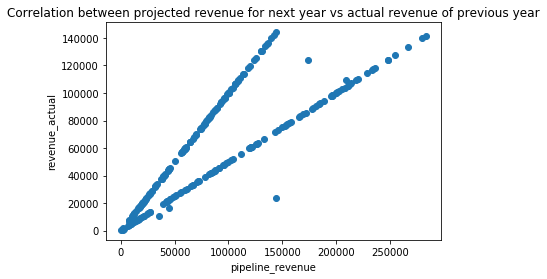

In [7]:
plt.scatter(x=df['Pipeline Revenue'], y=df['revenue_actual'])
plt.xlabel('pipeline_revenue')
plt.ylabel('revenue_actual')
plt.title('Correlation between projected revenue for next year vs actual revenue of previous year')

While the Pipeline Revenue is high, it seems, the actual revenue is way lesser and has linear correlation for the most as seen from the scatter plot. So, either one of them can be used for analysis. Also, "revenue_actual" is combination of "Unit_Price" and "Units_Sold", so instead of two metrics, we can use the combined metric to measure performance, which would be easier.


Since, these two variables are highly correlated, let's check if other variables are correlated by plotting a correlation matrix.

In [8]:
#plotting a correlation matrix

df.corr()

,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
Year,1.000000,-0.096549,-0.107599,0.054440,-0.033524,-0.120754,-0.055293,0.004145,-0.106262
Units_Sold,-0.096549,1.000000,0.127869,0.625460,0.691260,0.809855,0.623348,0.026639,0.980160
Unit_Price,-0.107599,0.127869,1.000000,0.118455,0.134283,0.262149,0.099474,0.062999,0.290592
Customer_connects_count,0.054440,0.625460,0.118455,1.000000,0.424002,0.504146,0.372576,0.090117,0.621433
New_customer_count,-0.033524,0.691260,0.134283,0.424002,1.000000,0.600578,0.898090,0.026206,0.692998
Pipeline Revenue,-0.120754,0.809855,0.262149,0.504146,0.600578,1.000000,0.518509,0.035874,0.833976
New_customer_acquisition_target,-0.055293,0.623348,0.099474,0.372576,0.898090,0.518509,1.000000,-0.293031,0.620143
target_ratio,0.004145,0.026639,0.062999,0.090117,0.026206,0.035874,-0.293031,1.000000,0.035759
revenue_actual,-0.106262,0.980160,0.290592,0.621433,0.692998,0.833976,0.620143,0.035759,1.000000


Looking at the above table, it is clear that, not many variables are highly correlated. Apart from the revenues, variables "Customer Acquisition Target" and "New customer Count" seems to be highly correlated. Let's plot those two for better clarification.

Text(0,0.5,'New Customer count')

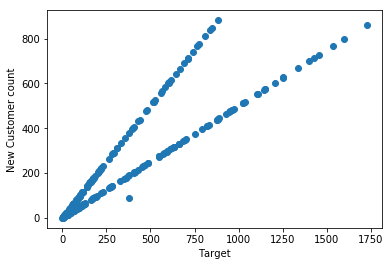

In [9]:
#plotting correlation between customer acquisition target and new customer count

plt.scatter(x=df.New_customer_acquisition_target, y=df.New_customer_count)
plt.xlabel('Target')
plt.ylabel('New Customer count')

Again these two are linearly correlated as seen from the plot and from the Pearson's R coeffiecient from previous cell. So, considering only 'Customer count' for analysis.

As of now, columns, 'revenue_actual' and 'New_customer_count' are considered, while 'Units_sold', 'Unit_Price', 'New_customer_acquisition_target' are dropped from analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f04468fd0>,
      dtype=object)

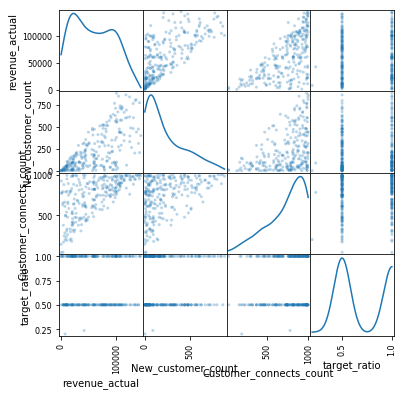

In [13]:
#Plotting scatter matrix on the remaining elements to see if the chosen variables have correlation
df2 = df[['revenue_actual', 'New_customer_count', 'Customer_connects_count', 'target_ratio']]
pd.plotting.scatter_matrix(df2, alpha=0.3, diagonal='kde', figsize=(6,6))

Looking from the above plots, it looks like "Target ratio" is either 1 or 0.5, and no other value exists.

In [14]:
#Checking Target ratio

df.target_ratio.unique()

array([0.5       , 1.        , 0.2       ,        nan, 0.23544974])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
Salesman_ID                        250 non-null object
Year                               250 non-null int64
Units_Sold                         250 non-null int64
Unit_Price                         250 non-null float64
Customer_connects_count            250 non-null int64
New_customer_count                 250 non-null int64
Pipeline Revenue                   250 non-null int64
New_customer_acquisition_target    250 non-null int64
target_ratio                       249 non-null float64
revenue_actual                     250 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 19.6+ KB


In [9]:
#Sorting by revenue_actual to find the top 5 sellers

df.sort_values('revenue_actual', ascending=False, inplace=True)

In [10]:
#Top 5 sellers 
df.head(5)

,Salesman_ID,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
42,MI-9048,2012,988,145.8,989,401,144050,401,1.0,144050.4
7,OH-3055,2012,995,142.6,999,208,141887,208,1.0,141887.0
172,NH-7121,2015,949,149.2,950,774,283182,774,1.0,141590.8
139,PA-4952,2014,978,143.1,996,312,139952,624,0.5,139951.8
118,MS-7667,2014,967,144.5,979,475,279463,950,0.5,139731.5


In [11]:
df.tail(5)

,Salesman_ID,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
106,MI-8175,2014,14,125.6,779,10,1758,10,1.0,1758.4
202,NC-6029,2016,12,122.4,769,6,2938,6,1.0,1468.8
127,MS-1168,2014,9,101.4,42,5,1825,5,1.0,912.6
138,OR-3391,2014,8,111.1,922,1,1778,2,0.5,888.8
81,VA-3336,2013,4,131.7,142,0,527,0,NaN,526.8


The above two cells shows top and bottom 5 sellers, without taking the year in consideration, which means, the sales person may have perfomed better in other year, and it won't be a good indicator of their overall performance. Let's see if the performance of the top 5 sellers has been consistent across five years.

In [32]:
# Getting indexes of top 5

df_top = df.loc[df.Salesman_ID.isin(df.head().Salesman_ID.values)]

In [123]:
gb_id_year_top = df_top.groupby(['Salesman_ID', 'Year']).sum()['revenue_actual'].unstack()

In [124]:
gb_id_year_top.head()

Year,2012,2013,2014,2015,2016
Salesman_ID,,,,,
MI-9048,144050.4,117264.4,5409.4,70224.0,43701.6
MS-7667,62885.4,32634.0,139731.5,30567.0,108836.0
NH-7121,23864.8,130245.0,124066.1,141590.8,109554.0
OH-3055,141887.0,77404.0,3587.1,7478.6,72859.6
PA-4952,88927.2,74712.0,139951.8,130278.6,12776.4


From the above cell's output we can see that, all though the Sales person MI-9048 has the highest sales in all the years combined, his sales in the year 2014 is too less. which is why this is not a good measure of performance

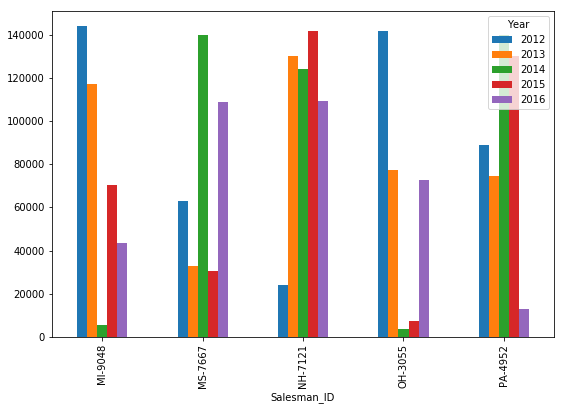

In [128]:
# Visualizing performance of top 5 sales persons over the year
fig = gb_id_year_top.head().plot.bar()
fig.figure.set_figheight(6)
fig.figure.set_figwidth(9)

From the above bar graph, we can see that, the performance of the salesman over the years aren't consistent, and hence, this method of selecting the top performer is rejected.

In [105]:
#Cumulative performance of salesman over the years.

gb_top = df.groupby('Salesman_ID').sum().sort_values('revenue_actual', ascending=False)

In [106]:
# Top 5 performers
top = gb_top.head()

# Bottom 5 performers
bottom = gb_top.tail()

In [107]:
top

,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
Salesman_ID,,,,,,,,,
NH-7121,10070,3944,667.5,4279,2331,941108,3719,3.5,529320.7
VT-9070,10070,3692,631.0,4616,1833,609626,3567,3.0,475580.6
IL-1673,10070,3576,646.2,4037,967,940836,1229,4.0,470417.9
PA-4952,10070,3261,659.3,3926,1455,459423,2145,3.0,446646.0
CA-3697,10070,3049,656.5,4368,1943,471404,3035,3.5,404766.5


In [108]:
bottom

,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
Salesman_ID,,,,,,,,,
VA-2792,10070,1651,623.0,3122,499,204816,559,4.00000,199924.6
MI-8175,10070,1588,614.9,3197,1060,305479,1772,4.00000,194864.9
VT-1811,10070,1476,597.4,3622,870,202539,1578,3.50000,172991.2
HI-9241,10070,801,640.2,2336,282,137820,429,3.50000,104401.0
MN-4564,10070,755,530.2,2615,328,184022,695,3.23545,83215.5


In [135]:
top_df = pd.DataFrame()
for idx in top.index:
    top_df = top_df.append(df[df['Salesman_ID'] == idx])

Units_Sold  Unit_Price  Customer_connects_count  \
Salesman_ID Year                                                    
CA-3697     2012         897       140.2                      935   
            2013         477       139.7                      836   
            2014         458       110.5                      828   
            2015         634       129.9                      780   
            2016         583       136.2                      989   
IL-1673     2012         899       148.2                      947   
            2013         648       110.2                      745   
            2014         557       108.7                      690   
            2015         770       136.8                      900   
            2016         702       142.3                      755   
NH-7121     2012         184       129.7                      641   
            2013         914       142.5                      971   
            2014         967       128.3                      759   
            2015         949       149.2                      950   
            2016         930       117.8                      958   
PA-4952     2012         716       124.2                      737   
            2013         528       141.5                      569   
            2014         978       143.1                      996   
            2015         922       141.3                      981   
            2016         117       109.2                      643   
VT-9070     2012         684       140.5                      799   
            2013         784       139.2                      897   
            2014         414       101.3                      960   
            2015         992       137.4                      992   
            2016         818       112.6                      968   

                  New_customer_count  Pipeline Revenue  \
Salesman_ID Year                                         
CA-3697     2012                 488            125759   
            2013                 333            133274   
            2014                 318             50609   
            2015                 518             82357   
            2016                 286             79405   
IL-1673     2012                 202            266464   
            2013                  60            142819   
            2014                 176            121092   
            2015                 476            210672   
            2016                  53            199789   
NH-7121     2012                 169            144050   
            2013                 481            130245   
            2014                 332            174077   
            2015                 774            283182   
            2016                 575            209554   
PA-4952     2012                  43             88927   
            2013                 330             74712   
            2014                 312            139952   
            2015                 765            130279   
            2016                   5             25553   
VT-9070     2012                  99             96102   
            2013                 700            109133   
            2014                 317             83876   
            2015                 442            136301   
            2016                 275            184214   

                  New_customer_acquisition_target  target_ratio  \
Salesman_ID Year                                                  
CA-3697     2012                              976           0.5   
            2013                              333           1.0   
            2014                              636           0.5   
            2015                              518           1.0   
            2016                              572           0.5   
IL-1673     2012                              404           0.5   
            2013                              120  

In [140]:
top_df_un = top_df.groupby(['Salesman_ID', 'Year']).sum()[['revenue_actual', 'Customer_connects_count', 'New_customer_count']].unstack()
top_df_un

revenue_actual                                          \
Year                  2012      2013      2014      2015      2016   
Salesman_ID                                                          
CA-3697           125759.4   66636.9   50609.0   82356.6   79404.6   
IL-1673           133231.8   71409.6   60545.9  105336.0   99894.6   
NH-7121            23864.8  130245.0  124066.1  141590.8  109554.0   
PA-4952            88927.2   74712.0  139951.8  130278.6   12776.4   
VT-9070            96102.0  109132.8   41938.2  136300.8   92106.8   

            Customer_connects_count                     New_customer_count  \
Year                           2012 2013 2014 2015 2016               2012   
Salesman_ID                                                                  
CA-3697                         935  836  828  780  989                488   
IL-1673                         947  745  690  900  755                202   
NH-7121                         641  971  759  950  958                169   
PA-4952                         737  569  996  981  643                 43   
VT-9070                         799  897  960  992  968                 99   

                                 
Year        2013 2014 2015 2016  
Salesman_ID                      
CA-3697      333  318  518  286  
IL-1673       60  176  476   53  
NH-7121      481  332  774  575  
PA-4952      330  312  765    5  
VT-9070      700  317  442  275

Text(0,0.5,'Customer_connects_count')

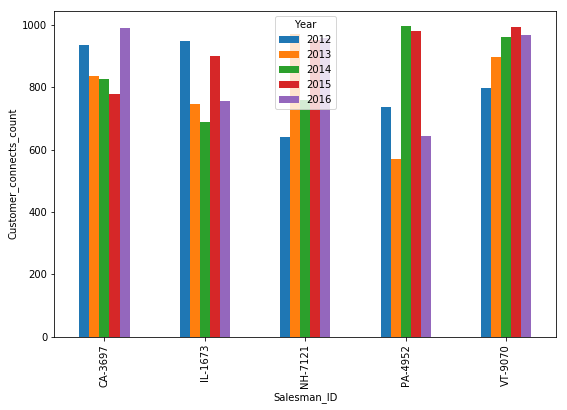

In [147]:
# Visualizing peformance of top 5 peformers over the years for various factor
fig = top_df_un['Customer_connects_count'].plot.bar()
fig.figure.set_figheight(6)
fig.figure.set_figwidth(9)
fig.set_ylabel('Customer_connects_count')

The above bar plot shows that, the customer count maintained by the top sales persons has remained consistent throughout the years, and so is the 'revenue_actual' even though the difference between the 'revenue' earned with respect to the years have a higher deviation as compared to the customer count


Text(0,0.5,'Revenue_actual')

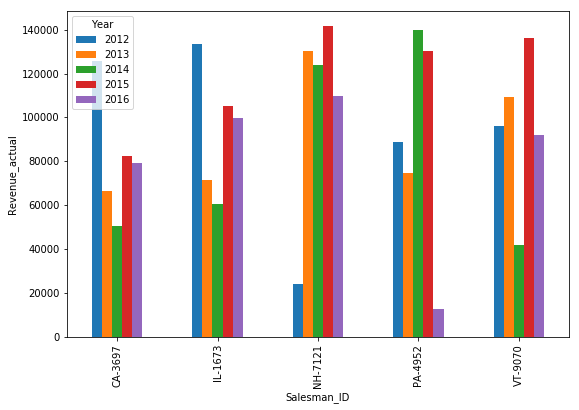

In [148]:
fig = top_df_un['revenue_actual'].plot.bar()
fig.figure.set_figheight(6)
fig.figure.set_figwidth(9)
fig.set_ylabel('Revenue_actual')

Text(0,0.5,'New_customer_count')

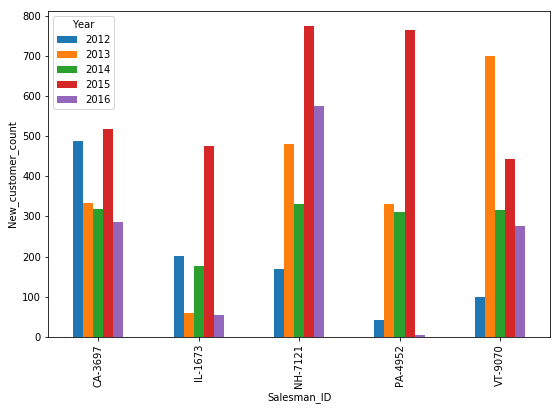

In [149]:
fig = top_df_un['New_customer_count'].plot.bar()
fig.figure.set_figheight(6)
fig.figure.set_figwidth(9)
fig.set_ylabel('New_customer_count')

In [150]:
# Creating a similar DataFrame for bottom 5,
bottom_df = pd.DataFrame()
for idx in bottom.index:
    bottom_df = bottom_df.append(df[df['Salesman_ID'] == idx])

In [151]:
bottom_df_un = bottom_df.groupby(['Salesman_ID', 'Year']).sum()[['revenue_actual', 'Customer_connects_count', 'New_customer_count']].unstack()
bottom_df_un

revenue_actual                                      \
Year                  2012     2013     2014     2015     2016   
Salesman_ID                                                      
HI-9241            25357.2  17420.0  33419.0  16918.8  11286.0   
MI-8175            21190.0  89424.3   1758.4  45134.1  37358.1   
MN-4564             3936.9  16430.0  42017.2  10449.6  10381.8   
VA-2792             4890.6  16805.5  64222.8  87551.1  26454.6   
VT-1811            87525.0  22069.6  21084.0  33849.6   8463.0   

            Customer_connects_count                     New_customer_count  \
Year                           2012 2013 2014 2015 2016               2012   
Salesman_ID                                                                  
HI-9241                         475  296  437  797  331                 57   
MI-8175                         456  729  779  849  384                 87   
MN-4564                         792  196  781  307  539                 16   
VA-2792                         169  332  900  963  758                  9   
VT-1811                         810  994  417  904  497                572   

                                 
Year        2013 2014 2015 2016  
Salesman_ID                      
HI-9241       78    2   87   58  
MI-8175      625   10  179  159  
MN-4564      145   89   24   54  
VA-2792       51  138  142  159  
VT-1811      140   94   22   42

The New customer count index says the answer this time. Although the other indices has much variance, the New_customer_count is pretty much low and in similar range for all the bottom 5 performers,

if I were to use a weighted peformance index metric instead of using 'revenue', the "New_customer_count" would penalise the bottom performers, and I don't expect a change in the outcome of who is last even after using weighted metrics.

### Summary

After loading the data, first the data is checked for duplicates and nulls, once the data is found to be clean, in order to remove unnecessary KPIs, I plotted various scatter plots, scatter matrices, and selected only one of the two variables if they are highly 'Correlated'.

As a result, 'Unit_price', 'Units_sold', 'Pipeline Revenue', 'New_customer_acquisition_target' were not considered for further analysis. 

Then, for three methods of analysis were considered,

1. Selecting those who has the most 'revenue_actual' in any year as top.

2. Selecting those who have highest sum of 'revenue_actual' in all the year as top.

3. Creating another metric which is a weighted combination of existing metrics.

P.S : 'revenue_actual' = 'Units_sold' * 'Unit_price'

#### Process of selection

Since the variance of 'revenue_actual' over the years, for top perfomers as per method 1 was pretty high, the method 1 was rejected.

Method 2 seemed to be most suitable as per Visualisation made earlier, and hence has been selected.

As for method 3, Using a weighted metric seemingly will give similar results as from method 2, as all bottom perfomers have low 'New_customer_count' and this metric will bring down the total score of the sales person and I expect the **bottom** performers would remain the same, and for **top** performers, the **revenue_actual** is pretty high and this will result in high overall score thus again, there's a high chance for them to remain same. Although these results will primarily depend on the weight factor one would choose.

In [154]:
# Here's the top 5 sales person list
top

,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
Salesman_ID,,,,,,,,,
NH-7121,10070,3944,667.5,4279,2331,941108,3719,3.5,529320.7
VT-9070,10070,3692,631.0,4616,1833,609626,3567,3.0,475580.6
IL-1673,10070,3576,646.2,4037,967,940836,1229,4.0,470417.9
PA-4952,10070,3261,659.3,3926,1455,459423,2145,3.0,446646.0
CA-3697,10070,3049,656.5,4368,1943,471404,3035,3.5,404766.5


In [153]:
# Here's bottom 5
bottom

,Year,Units_Sold,Unit_Price,Customer_connects_count,New_customer_count,Pipeline Revenue,New_customer_acquisition_target,target_ratio,revenue_actual
Salesman_ID,,,,,,,,,
VA-2792,10070,1651,623.0,3122,499,204816,559,4.00000,199924.6
MI-8175,10070,1588,614.9,3197,1060,305479,1772,4.00000,194864.9
VT-1811,10070,1476,597.4,3622,870,202539,1578,3.50000,172991.2
HI-9241,10070,801,640.2,2336,282,137820,429,3.50000,104401.0
MN-4564,10070,755,530.2,2615,328,184022,695,3.23545,83215.5
